In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import geopandas as gpd
import glob
from tqdm import tqdm

%matplotlib inline
import statsmodels as sm
from statsmodels.imputation import mice

In [2]:
ref = pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\tblRockGeoData.csv', index_col = [0])
path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\ngdbrock-fUS56\\ngdbrock-fUS56\\'
allFiles=glob.glob(path+"*.csv")
analysis = pd.DataFrame
moving = []
for file in allFiles:
    types = pd.read_csv(file)
    moving.append(types)
analysis = pd.concat(moving, sort=False)
    
    
merged = ref.merge(analysis, on='lab_id')
merged.drop(columns=['br_ppm', 'ir_ppm','rn_ppm', 'i_ppm', 'ir_ppb', 'au_ppb'], inplace=True)
merged['tracking'] = np.arange(0,len(merged))

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,14,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


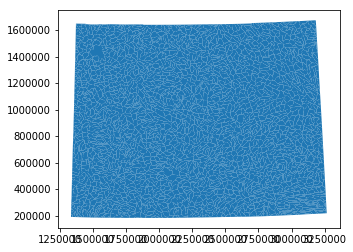

In [3]:
huc12=gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp') #reads in the hydraulic basin units and adds an area column
huc12= huc12.to_crs({'init': 'epsg:3732'})
huc12.plot()

In [147]:
imp=sm.imputation.mice.MICEData(merged.iloc[:,32:],perturbation_method='gaussian', k_pmm=2)
for j in tqdm(range(200)):
    imp.update_all()
    if j%10 ==0:
        imp.data.to_csv('D:\yep'+str(j)+'.csv')
    else:
        pass




  0%|                                                                                          | 0/200 [00:00<?, ?it/s]C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)



  0%|▍                                                                               | 1/200 [00:28<1:33:04, 28.06s/it]


  1%|▊                                                                               | 2/200 [00:53<1:28:53, 26.93s/it]


  2%|█▏                                                                              | 3/200 [01:17<1:24:52, 25.85s/it]


  2%|█▌                                                                              | 4/200 [01:40<1:22:22, 25.21s/it]


  2%|██                   

In [148]:
imputed_merged = merged[['lab_id', 'job_id', 'submitter', 'date_sub', 'date_sub2', 'field_id',
       'state', 'country', 'datum', 'spheroid', 'latitude', 'longitude',
       'depth', 'locat_desc', 'datecollct', 'sample_src', 'methcollct',
       'primeclass', 'xndryclass', 'spec_name', 'addl_attr', 'geol_age',
       'stratgrphy', 'mineralztn', 'alteration', 'struct_src', 'dep_envirn',
       'source_rk', 'metamrphsm', 'facies_grd', 'prep', 'mesh_size', 'tracking']].merge(imp.data, on='tracking')
imputed_merged.to_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\imputed_rock_values.csv')

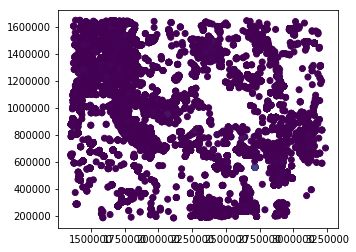

In [149]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
#writes the point data to a shapefile in the dir called data.shp
geometry = [Point(xy) for xy in zip(imputed_merged.longitude, imputed_merged.latitude)]
crs = {'init': 'epsg:3732'} #http://www.spatialreference.org/ref/epsg/2263/
geo_df = GeoDataFrame(imputed_merged, crs={'init': 'epsg:4326'}, geometry=geometry)
projGeoDF=geo_df.to_crs(crs)
projGeoDF.plot(column='co_ppm')

In [150]:
points_with_basin=gpd.sjoin(huc12, projGeoDF, how='inner', op='intersects')

In [151]:
maximal = points_with_basin.dissolve(by='HUC_12', aggfunc='max')

In [152]:
maximal = maximal.drop(columns=['AREA', 'PERIMETER', 'WY_HU12_', 'WY_HU12_ID', 'HUC_8',
       'HUC_10', 'ACRES', 'STATES', 'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME',
       'HU_10_MOD', 'HU_10_TYPE', 'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD',
       'HU_12_TYPE', 'HU_2_NAME', 'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME',
       'Shape_Leng', 'Shape_Area', 'index_right'])
maximal.to_file(driver='ESRI Shapefile', filename='max_rock_values.shp')

# Read in the hotspot data

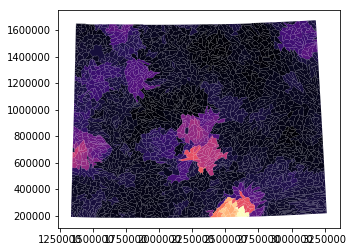

In [23]:
huc12 = gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp') #reads in the hydraulic basin units and adds an area column
huc12 = huc12.to_crs({'init': 'epsg:3732'})

path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\hotspot analysis\\rock hotspot joined with hucs\\PbZn\\'
allFiles=glob.glob(path+"*.csv")
frame=pd.DataFrame
listed=[]
for file in allFiles:
    df = pd.read_csv(file, index_col=[0])
    listed.append(df)
frame = pd.concat(listed, sort=False)
frame = frame.drop(columns=['Join_Count', 'TARGET_FID', 'AREA', 'PERIMETER', 'WY_HU12_',
       'WY_HU12_ID', 'HUC_8', 'HUC_10', 'ACRES', 'STATES',
       'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME', 'HU_10_MOD', 'HU_10_TYPE',
       'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD', 'HU_12_TYPE', 'HU_2_NAME',
       'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME', 'Shape_Leng', 'SOURCE_ID',
       'GiPValue', 'NNeighbors', 'Gi_Bin',
       'Shape_Length', 'Shape_Area'])
summary = frame.groupby('HUC_12', as_index=False).sum()
middle=huc12.merge(summary.astype(object), on='HUC_12', how='right')
combined = huc12.merge(middle[['HUC_12', 'GiZScore']].astype(str), on='HUC_12', how='left')
combined.plot(column=pd.to_numeric(combined['GiZScore']), cmap='magma')

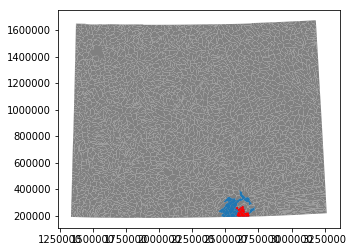

In [22]:
fig, ax = plt.subplots()
combined.plot( color='gray', ax=ax)
combined[pd.to_numeric(combined['GiZScore'])>=np.percentile(pd.to_numeric(combined['GiZScore']), 99)].plot(ax=ax)
combined[pd.to_numeric(combined['GiZScore'])==pd.to_numeric(combined['GiZScore']).max()].plot(ax=ax, color='r')

In [20]:
combined[pd.to_numeric(combined['GiZScore'])>=np.percentile(pd.to_numeric(combined['GiZScore']), 95)].to_file(driver='ESRI Shapefile', filename='PbCuZn_rock.shp')

In [177]:
combined[pd.to_numeric(combined['GiZScore'])>=np.percentile(pd.to_numeric(combined['GiZScore']), 99.9)]

,AREA,PERIMETER,WY_HU12_,WY_HU12_ID,HUC_8,HUC_10,HUC_12,ACRES,STATES,NCONTRB_A,...,HU_12_MOD,HU_12_TYPE,HU_2_NAME,HU_4_NAME,HU_6_NAME,HU_8_NAME,Shape_Leng,Shape_Area,geometry,GiZScore
537,0.010888,0.644575,741,136,10070001,1007000101,100700010102,23939.540835,WY,0.0,...,NM,S,Missouri,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.644575,0.010888,"POLYGON ((1608299.576571877 1337004.920142819,...",192.45712122400008
539,0.010444,0.725447,743,137,10070001,1007000102,100700010203,22953.389405,WY,0.0,...,NM,S,Missouri,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.725447,0.010444,"POLYGON ((1627971.15736426 1333672.009896841, ...",192.45712122400008
564,0.005835,0.342816,768,142,10070001,1007000102,100700010205,12836.175692,WY,0.0,...,NM,S,Missouri,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.342816,0.005835,"POLYGON ((1668031.666070117 1315111.707562657,...",192.45712122400008
567,0.012827,0.595069,771,143,10070001,1007000102,100700010201,28218.875044,WY,0.0,...,NM,S,Missouri,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.595069,0.012827,"POLYGON ((1701375.116237481 1314059.67307658, ...",192.45712122400008
576,0.008160,0.438513,780,145,10070001,1007000101,100700010103,17957.152973,WY,0.0,...,NM,S,Missouri,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.438513,0.008160,"POLYGON ((1625573.662783505 1292264.151836674,...",192.45712122400008
593,0.017619,0.701528,798,149,10070001,1007000101,100700010101,38797.287097,WY,0.0,...,NM,S,Missouri,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.701528,0.017619,"POLYGON ((1653874.687240637 1301451.187082283,...",192.45712122400008
619,0.015751,0.855359,825,157,17040101,1704010106,170401010606,34715.566718,WY,0.0,...,NM,S,Pacific Northwest,Upper Snake,Snake Headwaters,Snake Headwaters,0.855359,0.015751,"POLYGON ((1640528.419578866 1259625.176101413,...",192.45712122400008
627,0.010846,0.576109,833,303,10080013,1008001301,100800130102,23906.751846,WY,0.0,...,NM,S,Missouri,Big Horn,Big Horn,South Fork Shoshone,0.576109,0.010846,"POLYGON ((1717309.503436315 1267396.132879012,...",192.45712122400008
652,0.007650,0.439000,858,165,17040101,1704010106,170401010602,16868.777763,WY,0.0,...,NM,S,Pacific Northwest,Upper Snake,Snake Headwaters,Snake Headwaters,0.439000,0.007650,"POLYGON ((1676548.032863513 1262054.731417016,...",192.45712122400008
661,0.009295,0.533345,867,166,17040101,1704010106,170401010605,20497.934012,WY,0.0,...,NM,S,Pacific Northwest,Upper Snake,Snake Headwaters,Snake Headwaters,0.533345,0.009295,"POLYGON ((1642095.878057994 1259388.184016562,...",192.45712122400008


In [179]:
pd.to_numeric(combined['GiZScore']).max()

192.4571212240001